# Strategies for GW follow-up with Vera C. Rubin Observatory

Reference: [Andreoni et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021arXiv211101945A/abstract); under review for publication in The Astrophysical Journal Supplement Series; ArXiv 2111.01945


The code for these plots is based on some matplotlib resources such as: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_piecharts.html 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import OrderedDict

In [2]:
def plot_edges(results, ax, marker_size=50, merger=None):
    # Plot marker edges for exposure times
    ylabels = list(results.keys())
    for i in range(len(ylabels)):
        timeline = results[ylabels[i]]["cadence_hr"]
        timeline += results[ylabels[i]]["gz"]
        timeline = np.array(timeline)

        timeline_30 = timeline[np.where(timeline < 24)[0]]
        timeline_180 = timeline[np.where(timeline >= 24)[0]]

        # Condition for NS-BH mergers
        if merger == 'nsbh' and "<20" in ylabels[i]:
            timeline_180 = np.unique(np.concatenate((timeline_30, timeline_180)))
        
        ax.plot(timeline_30, [(i*0.5)+0.5] * len(timeline_30), 'o',
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1,
                markersize=50,
                label="30s")
        ax.plot(timeline_180, [(i*0.5)+0.5] * len(timeline_180), 'o',
                markerfacecolor='none',
                markeredgecolor='red',
                markeredgewidth=3,
                markersize=marker_size,
                label="180s")

# Strategy for binary neutron star merger follow-up

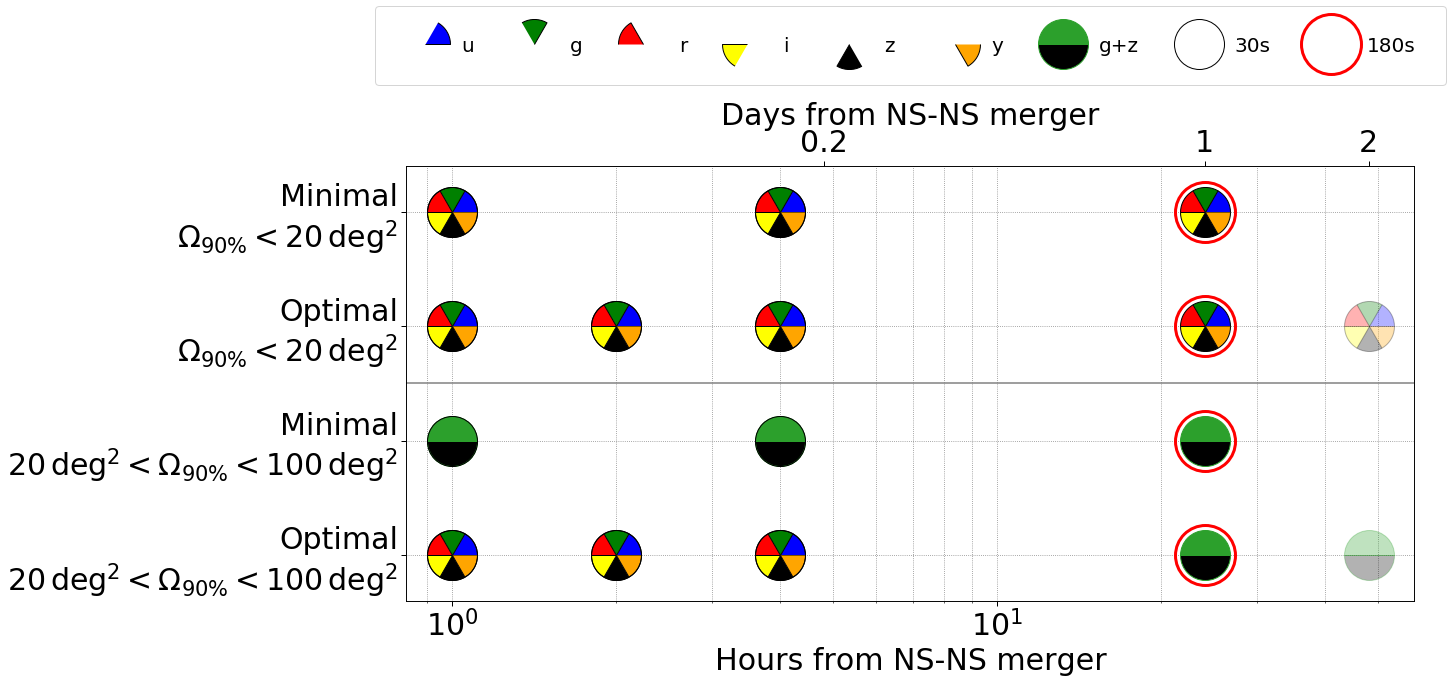

In [3]:
results = {
            'Minimal\n'+r'$\Omega_{\rm{90\%}}<20\,\rm{deg^2}$': {"cadence_hr": [1, 4, 24], "gz": [], "category": "default"},
            'Optimal\n'+r'$\Omega_{\rm{90\%}}<20\,\rm{deg^2}$': {"cadence_hr": [1, 2, 4, 24], "gz": [], "category": "default"},
            'Minimal\n'+r'$20\,\rm{deg^2}<\Omega_{\rm{90\%}}<100\,\rm{deg^2}$': {"cadence_hr": [], "gz": [1, 4, 24], "category": "default"},
            'Optimal\n'+r'$20\,\rm{deg^2}<\Omega_{\rm{90\%}}<100\,\rm{deg^2}$': {"cadence_hr": [1, 2, 4], "gz": [24], "category": "default"}
}

filters = {'u':'b', 'g':'g', 'r':'r', 'i':'yellow', 'z':'k', 'y':'orange'}


def chart(results):
    ylabels = list(results.keys())
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    timelines = {}
    for i,strategy in enumerate(ylabels):
        timelines[strategy] = results[strategy]["cadence_hr"]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    marker_size = 50
    
    # Markers piechart
    # first define the ratios. Here one value because all the same
    ratio0 = 1./6       #  same for 6 filters
    ratio = ratio0

    # calculate the points of the first pie marker
    # these are just the origin (0,0) +
    # some points on a circle cos,sin
    xy_list = []
    r1 = ratio0
    r2 = r1 + ratio0
    r3 = r2 + ratio0
    r4 = r3 + ratio0
    r5 = r4 + ratio0
    
    x = [0] + np.cos(np.linspace(0, 2*math.pi*r1, 10)).tolist()
    y = [0] + np.sin(np.linspace(0, 2*math.pi*r1, 10)).tolist()
    xy_list.append(list(zip(x, y)))
    
    x = [0] + np.cos(np.linspace(2*math.pi*r1, 2*math.pi*r2, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r1, 2*math.pi*r2, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r2, 2*math.pi*r3, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r2, 2*math.pi*r3, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r3, 2*math.pi*r4, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r3, 2*math.pi*r4, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r4, 2*math.pi*r5, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r4, 2*math.pi*r5, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r5, 2*math.pi, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r5, 2*math.pi, 10)).tolist()
    xy_list.append(list(zip(x, y)))    
    
    for i in range(len(ylabels)):
        alpha = 1
        timeline = results[ylabels[i]]["cadence_hr"]

        for xy, f in zip(xy_list, filters):
            ax.plot(timeline, [(i*0.5)+0.5] * len(timeline), marker=(xy),
                    ms=marker_size, markerfacecolor=filters[f], markeredgecolor='k', linestyle='none',
                    label=f)
        if len(timeline) > 0:
            if timeline[-1] == 24 and 'Optimal' in ylabels[i]:
                for xy, f in zip(xy_list, filters):
                    ax.plot([48], [(i*0.5)+0.5], marker=(xy),
                        ms=marker_size, markerfacecolor=filters[f], markeredgecolor='k', linestyle='none',
                        alpha=0.3)

        if len(results[ylabels[i]]["gz"]) > 0:
            marker_style = dict(color='tab:green', linestyle='none', marker='o',
                                markersize=marker_size, markerfacecoloralt='k')
            timeline = results[ylabels[i]]["gz"]
            ax.plot(timeline, [(i*0.5)+0.5] * len(timeline), fillstyle='top',
                    alpha=alpha, **marker_style, label="g+z")

            if results[ylabels[i]]["gz"][0] == 24:
                ax.plot([48], [(i*0.5)+0.5], fillstyle='top',
                        alpha=0.3, **marker_style)

    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 16)
    ax.grid(which='both', color='grey', linestyle=':')
    ax.set_xlabel(f"Hours from NS-NS merger", fontsize=30)

    # plot edges based on exptime
    plot_edges(results, ax, marker_size=60)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.39),
            ncol=9, fancybox=True, shadow=False, fontsize=20, framealpha=0.8, borderpad=1.5)
    
    ax.set_xscale("log")
    ax.tick_params(labelsize=30, width=1, length=5)
    ax.set_ylim(ymin = 0.3, ymax = ilen*0.5+0.2)
    ax.invert_yaxis()
    # Fix the x the limits
    xlim = ax.get_xlim() # get existing x limits
    ax.set_xlim(xlim)
    
    # Secondary axis
    ax2 = ax.twiny()  # instantiate a second axes that shares the same y-axis
    xlim2 = [np.log10(xlim[0]), np.log10(xlim[1])]
    ax2.set_xlim(xlim2)
    x2ticks = [0.2, 1, 2]
    ax2.set_xticks([np.log10(24*x) for x in x2ticks])
    ax2.set_xticklabels(x2ticks)
    ax2.tick_params(labelsize=30, width=1, length=5)
    ax2.set_xlabel(f"Days from NS-NS merger", fontsize=30)


    # PLOT horizontal line
    ax.plot([xlim[0], xlim[1]], 2*[np.mean(np.arange(len(results))) - 0.25], color='grey')
    
    plt.subplots_adjust(left=0.2)

    plt.savefig("strategy_nsns_Andreoni2021.pdf", bbox_inches='tight')

    return fig, ax

fig, ax = chart(results)

plt.show()

# Strategy for NS-BH merger follow-up

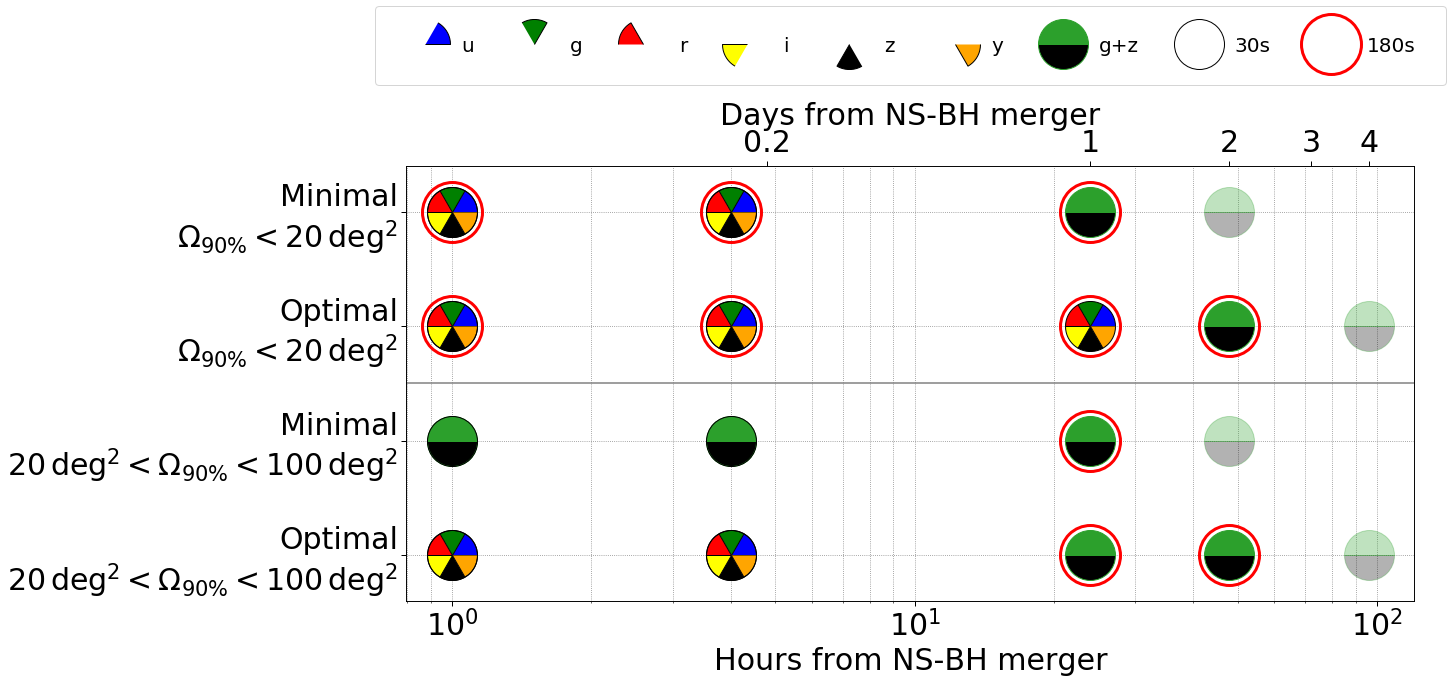

In [4]:
results = {
            'Minimal\n'+r'$\Omega_{\rm{90\%}}<20\,\rm{deg^2}$': {"cadence_hr": [1, 4], "gz": [24], "category": "default"},
            'Optimal\n'+r'$\Omega_{\rm{90\%}}<20\,\rm{deg^2}$': {"cadence_hr": [1, 4, 24], "gz": [48], "category": "default"},
            'Minimal\n'+r'$20\,\rm{deg^2}<\Omega_{\rm{90\%}}<100\,\rm{deg^2}$': {"cadence_hr": [], "gz": [1, 4, 24], "category": "default"},
            'Optimal\n'+r'$20\,\rm{deg^2}<\Omega_{\rm{90\%}}<100\,\rm{deg^2}$': {"cadence_hr": [1, 4], "gz": [24, 48], "category": "default"}
}

filters = {'u':'b', 'g':'g', 'r':'r', 'i':'yellow', 'z':'k', 'y':'orange'}


def chart(results):
    ylabels = list(results.keys())
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    timelines = {}
    for i,strategy in enumerate(ylabels):
        timelines[strategy] = results[strategy]["cadence_hr"]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    marker_size = 50
    
    # Markers piechart
    # first define the ratios. Here one value because all the same
    ratio0 = 1./6       #  same for 6 filters
    ratio = ratio0

    # calculate the points of the first pie marker
    # these are just the origin (0,0) +
    # some points on a circle cos,sin
    xy_list = []
    r1 = ratio0
    r2 = r1 + ratio0
    r3 = r2 + ratio0
    r4 = r3 + ratio0
    r5 = r4 + ratio0
    
    x = [0] + np.cos(np.linspace(0, 2*math.pi*r1, 10)).tolist()
    y = [0] + np.sin(np.linspace(0, 2*math.pi*r1, 10)).tolist()
    xy_list.append(list(zip(x, y)))
    
    x = [0] + np.cos(np.linspace(2*math.pi*r1, 2*math.pi*r2, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r1, 2*math.pi*r2, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r2, 2*math.pi*r3, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r2, 2*math.pi*r3, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r3, 2*math.pi*r4, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r3, 2*math.pi*r4, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r4, 2*math.pi*r5, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r4, 2*math.pi*r5, 10)).tolist()
    xy_list.append(list(zip(x, y)))

    x = [0] + np.cos(np.linspace(2*math.pi*r5, 2*math.pi, 10)).tolist()
    y = [0] + np.sin(np.linspace(2*math.pi*r5, 2*math.pi, 10)).tolist()
    xy_list.append(list(zip(x, y)))    
    
    for i in range(len(ylabels)):
        alpha = 1
        timeline = results[ylabels[i]]["cadence_hr"]

        for xy, f in zip(xy_list, filters):
            ax.plot(timeline, [(i*0.5)+0.5] * len(timeline), marker=(xy),
                    ms=marker_size, markerfacecolor=filters[f], markeredgecolor='k', linestyle='none',
                    label=f)


        if len(results[ylabels[i]]["gz"]) > 0:
            marker_style = dict(color='tab:green', linestyle='none', marker='o',
                                markersize=marker_size, markerfacecoloralt='k')
            timeline = results[ylabels[i]]["gz"]
            ax.plot(timeline, [(i*0.5)+0.5] * len(timeline), fillstyle='top',
                    alpha=alpha, **marker_style, label="g+z")

            if results[ylabels[i]]["gz"][-1] == 24:
                ax.plot([48], [(i*0.5)+0.5], fillstyle='top',
                        alpha=0.3, **marker_style)
            elif results[ylabels[i]]["gz"][-1] == 48:
                ax.plot([96], [(i*0.5)+0.5], fillstyle='top',
                        alpha=0.3, **marker_style)

    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 16)
    
    ax.grid(which='both', color='grey', linestyle=':')
    ax.set_xlabel(f"Hours from NS-BH merger", fontsize=30)
    
    # plot edges based on exptime
    plot_edges(results, ax, merger='nsbh', marker_size=60)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.39),
            ncol=9, fancybox=True, shadow=False, fontsize=20, framealpha=0.8, borderpad=1.5)
    
    ax.set_xscale("log")
    ax.tick_params(labelsize=30, width=1, length=5)
    ax.set_ylim(ymin = 0.3, ymax = ilen*0.5+0.2)
    ax.invert_yaxis()
    # Fix the x the limits
    xlim = ax.get_xlim() # get existing x limits
    ax.set_xlim(xlim)

    # Secondary axis
    ax2 = ax.twiny()  # instantiate a second axes that shares the same y-axis
    xlim2 = [np.log10(xlim[0]), np.log10(xlim[1])]
    ax2.set_xlim(xlim2)
    x2ticks = [0.2, 1, 2, 3, 4]
    ax2.set_xticks([np.log10(24*x) for x in x2ticks])
    ax2.set_xticklabels(x2ticks)
    ax2.tick_params(labelsize=30, width=1, length=5)
    ax2.set_xlabel(f"Days from NS-BH merger", fontsize=30)


    # PLOT horizontal line
    ax.plot([xlim[0], xlim[1]], 2*[np.mean(np.arange(len(results))) - 0.25], color='grey')
    
    plt.subplots_adjust(left=0.2)
    plt.savefig("strategy_nsbh_Andreoni2021.pdf", bbox_inches='tight')

    return fig, ax

chart(results)

plt.show()

# Strategy for binary black hole merger follow-up

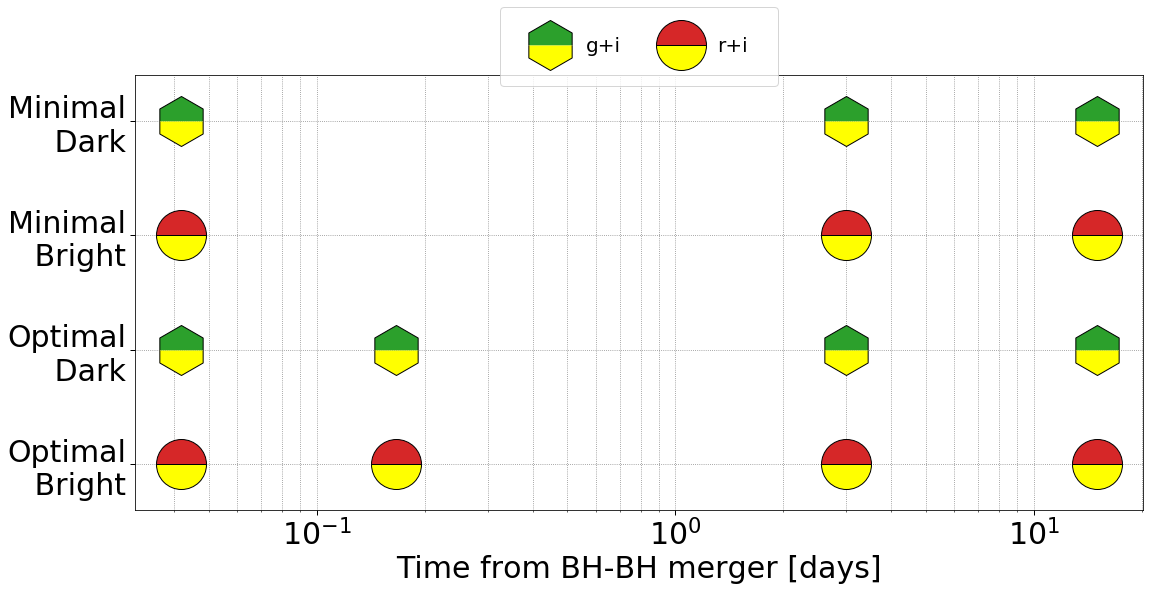

In [5]:
results = {
            'Minimal\n Dark': {"gi": [1/24, 3, 15], "ri": [], "category": "default"},
            'Minimal\n Bright': {"gi": [ ], "ri": [1/24, 3, 15], "category": "default"},
            'Optimal\n Dark': {"gi": [1/24, 4/24, 3, 15], "ri": [], "category": "default"},
            'Optimal\n Bright': {"gi": [], "ri": [1/24, 4/24, 3, 15], "category": "default"},
}

filters = {'u':'b', 'g':'g', 'r':'r', 'i':'yellow', 'z':'k', 'y':'orange'}


def chart(results):
    ylabels = list(results.keys())
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    timelines = {}
    for i,strategy in enumerate(ylabels):
        timelines[strategy] = results[strategy]["gi"]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    marker_size = 50
    alpha = 1

    for i in range(len(ylabels)):
        if len(results[ylabels[i]]["gi"]) > 0:
            marker_style = dict(color='tab:green', linestyle='none', marker='h',
                                markersize=marker_size, markerfacecoloralt='yellow',
                                markeredgecolor='k')
            timeline = results[ylabels[i]]["gi"]
            ax.plot(timeline, [(i*0.5)+0.5] * len(timeline), fillstyle='top',
                    alpha=alpha, **marker_style, label="g+i")
        if len(results[ylabels[i]]["ri"]) > 0:
            marker_style = dict(color='tab:red', linestyle='none', marker='o',
                                markersize=marker_size, markerfacecoloralt='yellow',
                                markeredgecolor='k')
            timeline = results[ylabels[i]]["ri"]
            ax.plot(timeline, [(i*0.5)+0.5] * len(timeline), fillstyle='top',
                    alpha=alpha, **marker_style, label="r+i")



    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 16)

    ax.grid(which='both', color='grey', linestyle=':')
    ax.set_xlabel(f"Time from BH-BH merger [days]", fontsize=30)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.18),
            ncol=7, fancybox=True, shadow=False, fontsize=20, framealpha=0.8, borderpad=1.5)
    
    ax.set_xscale("log")
    ax.tick_params(labelsize=30, width=1, length=5)
    ax.set_ylim(ymin = 0.3, ymax = ilen*0.5+0.2)
    ax.invert_yaxis()
    
    
    plt.subplots_adjust(left=0.2)

    plt.savefig("strategy_bhbh_Andreoni2021.pdf", bbox_inches='tight')

    return fig, ax

chart(results)

plt.show()